In [ ]:
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
#Download the flowers datasets
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin = dataset_url , fname = 'flower_photos' , untar = True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
import os
image_count = len(list(data_dir.glob("*/*.jpg")))

In [ ]:
image_count

3670

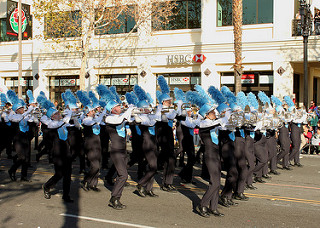

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
batch_size =32
width = 180
height = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir ,
    batch_size=batch_size ,
    image_size =  (height, width),
    validation_split = 0.2 ,
    subset = 'training',
    seed = 123 ,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir ,
    batch_size=batch_size ,
    image_size =  (height, width),
    validation_split = 0.2 ,
    subset = 'validation',
    seed = 123 ,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
class_names = train_ds.class_names

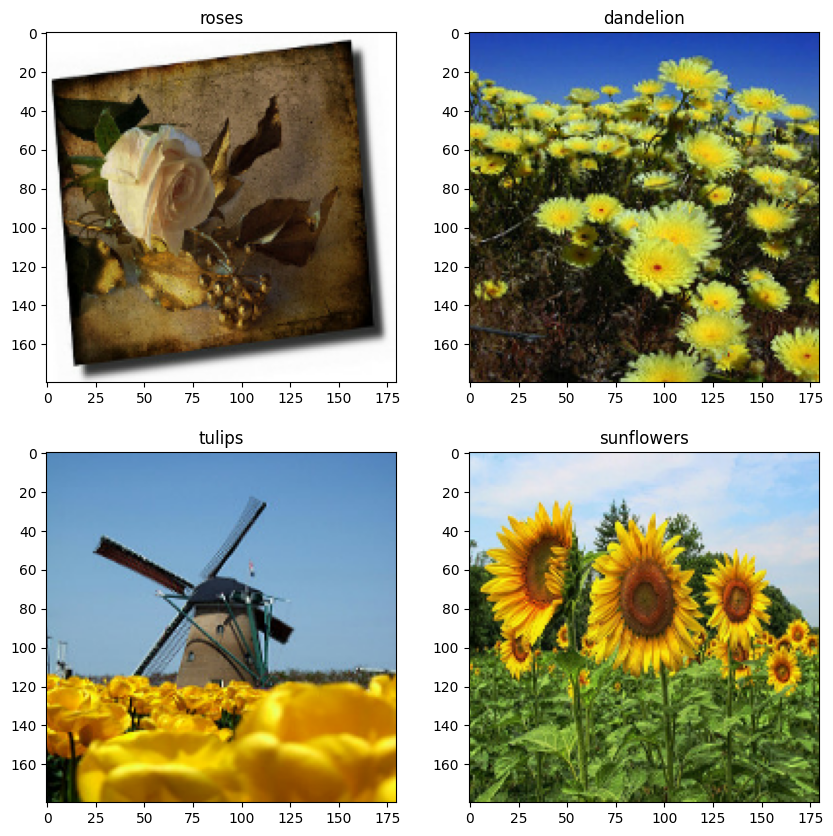

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image, label in train_ds.take(1) :
  for i in range(4) :
    ax = plt.subplot(2,2,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i].numpy()])

In [ ]:
#preprocess images....
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [ ]:
batch_before_normlize , label_batch = next(iter(train_ds))
first_image_before = batch_before_normlize[0]
print(np.min(first_image_before), np.max(first_image_before))
scaled_ds  = train_ds.map(lambda x , y : (rescale_layer(x), y))
image_batch , label_batch = next(iter(scaled_ds))
#verify the normalization
first_image = image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 255.0
0.0 0.96902645


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(32, 3  ,activation='relu' ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3  ,activation='relu' ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3  ,activation='relu' ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation ='softmax')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)


In [ ]:
history = model.fit(train_ds,
         validation_data = val_ds,
         epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 142s 2s/step - loss: 1.3329 - accuracy: 0.4305 - val_loss: 1.1137 - val_accuracy: 0.5409
Epoch 2/3
92/92 [==============================] - 129s 1s/step - loss: 1.1091 - accuracy: 0.5422 - val_loss: 1.1262 - val_accuracy: 0.5450
Epoch 3/3
92/92 [==============================] - 127s 1s/step - loss: 1.0116 - accuracy: 0.5957 - val_loss: 0.9247 - val_accuracy: 0.6172


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.332858,0.430518,1.113671,0.540872
1,1.109055,0.542234,1.126171,0.544959
2,1.011607,0.595708,0.924679,0.617166


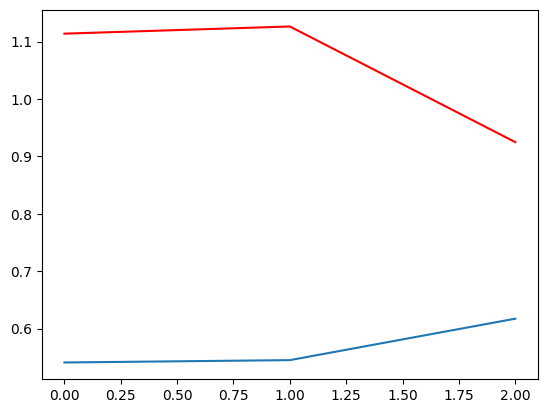

In [ ]:
plt.plot(history.history['val_loss'],'r')
plt.plot(history.history['val_accuracy'])

In [ ]:
path= "/content/download.jpg"
img = PIL.Image.open(path)

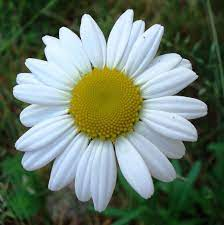

In [ ]:
img

In [ ]:
img_to_array = tf.keras.utils.img_to_array(img)

In [ ]:
img_to_array

array([[[42., 88., 23.],
        [38., 79., 19.],
        [32., 64., 14.],
        ...,
        [21., 30.,  9.],
        [21., 30.,  9.],
        [18., 30.,  6.]],

       [[44., 90., 26.],
        [40., 81., 21.],
        [34., 66., 17.],
        ...,
        [21., 30.,  9.],
        [20., 29.,  8.],
        [18., 30.,  6.]],

       [[45., 91., 29.],
        [41., 82., 26.],
        [36., 68., 21.],
        ...,
        [20., 29.,  8.],
        [20., 29.,  8.],
        [18., 30.,  6.]],

       ...,

       [[69., 82., 64.],
        [64., 77., 57.],
        [53., 64., 47.],
        ...,
        [17., 23., 11.],
        [12., 18.,  6.],
        [ 9., 15.,  3.]],

       [[53., 64., 48.],
        [56., 67., 51.],
        [54., 62., 47.],
        ...,
        [19., 25., 13.],
        [13., 19.,  7.],
        [ 9., 15.,  3.]],

       [[18., 26., 15.],
        [36., 42., 32.],
        [53., 56., 47.],
        ...,
        [16., 22., 12.],
        [17., 20., 11.],
        [19., 22., 13.]]

In [ ]:
img_to_array.shape

(225, 224, 3)

In [ ]:
new_image= tf.image.resize(
    img_to_array,
    size=(180,180)
)

In [ ]:
new= tf.expand_dims(new_image,axis=0)
predict = model.predict(new)

1/1 [==============================] - 0s 127ms/step


In [ ]:
class_names[predict.argmax()]

'daisy'